<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Parcial_1__Se%C3%B1ales_y_sistemas_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solución del punto #2 del parcial de Señales y Sistemas 2024_1_JUAN LEANDRO PARRA ARIAS_1002653993

Cual es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuncia de muestreo de 5KHz, aplicado a la señal continua x(t)= 3cos(1000πt) + 5sen(2000πt) + 10cos(11000πt). Realizar la simulación delmproceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

El código diseñado a continuacion es una representación gráfica de una señal continua x(t) y de como su versión discreta x[n] puede ser muestreada, así mismo se determina que la primera frecuencia de muestreo no cumple Nyquist, es por ello que se procede a realizar el analisis visto en las hojas del pdf escrito del mismo punto en cuestión, y por ende se toma una frecuencia de muestreo de tal manera que se cumpla con los requerimientos solicitados, teniendo como resultado la tercera y cuarta gráfica, implementando así un conversor adecuado para la señal estudiada.

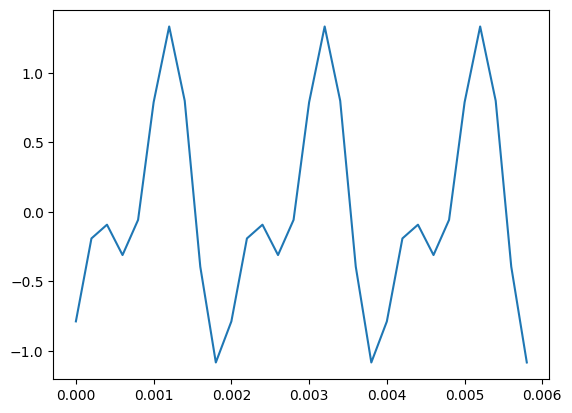

In [55]:
import numpy as np
import matplotlib.pyplot as plt
#Definir parámetros de la simulación

#Periodos de la señal
T1 = 1/500
T2 = 1/1000
T3 = 1/5500
#Periodo señal cuasiperiodica
T = 1/500
#Frecuencias
F1 = 1/T1
F2 = 1/T2
F3 = 1/T3
#Fs: frecuencia muestreo
Fs = 5000
Ts = 1/Fs #periodo muestreo

t = np.arange(0,3*T,Ts) #vector de tiempo que incluye tres periodos cuasiperiódica
x = 0.2121*np.cos(1000*np.pi*t) - 0.2121*np.sin(1000*np.pi*t) + 0.6*np.sin(2000*np.pi*t)-np.cos(11000*np.pi*t)

plt.plot(t,x)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()


#Cero y Pendiente

In [56]:
#cero y pendiente
def my_ceropen(x,ymin = -3.3, ymax = 3.3): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

In [57]:
#llamdo a cero y pendiente
y =  my_ceropen(x,ymin = -3.3, ymax = 3.3)

#Cuantización

In [58]:
from scipy.spatial.distance import cdist #función para estimar distancia punto discretizado al vector de estados
#función cuantización punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [59]:
#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 3.3
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#recorrer vector cero y pendiente discretizado para cuantizar
for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(y[i],ve)) #apilar datos cuantizando si i>0


#Graficar Señales

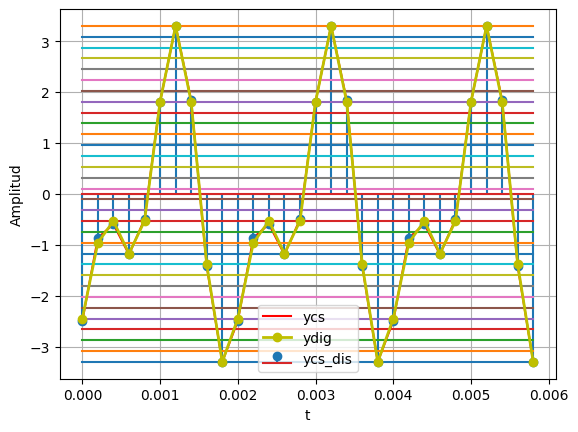

In [60]:
#graficar señales
plt.plot(t,y,c='r', label='ycs')#cs continua
plt.stem(t,y, label='ycs_dis')#cs discreta
#estados de cuantización
for v in ve:
  plt.plot(t,v*np.ones(len(t)))
# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

Implementacion de un conversor adecuado para la señal estudiada

Introduce la frecuencia de muestreo (Fs): 16000
Se cumple el criterio de Nyquist.


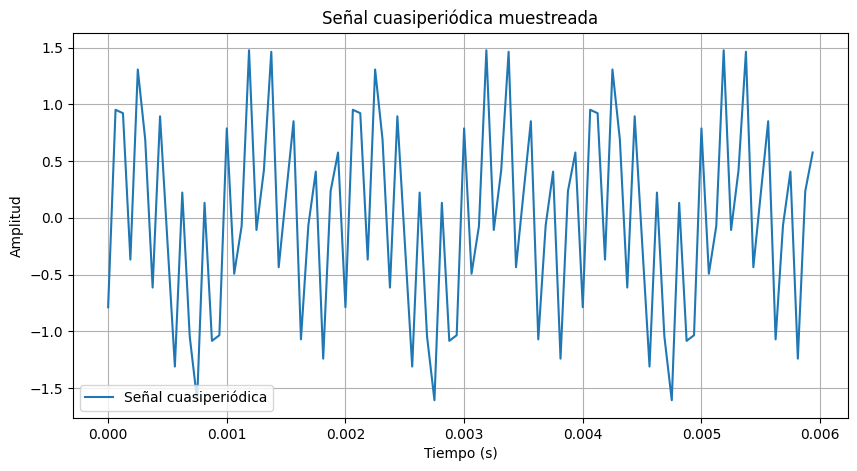

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Solicitar la frecuencia de muestreo como un valor entero
A = int(input("Introduce la frecuencia de muestreo (Fs): "))

# Definir periodos de las señales
T1 = 1 / 500
T2 = 1 / 1000
T3 = 1 / 5500

# Período de la señal cuasiperiódica
T = 1 / 500

# Calcular frecuencias
F1 = 1 / T1
F2 = 1 / T2
F3 = 1 / T3

# Establecer Fs inicial
Fs = A
Ts = 1 / Fs  # Periodo de muestreo

# Determinar la mayor frecuencia
mayor_F = max(F1, F2, F3)

# Verificar el criterio de Nyquist
if Fs >= 2 * mayor_F:
    print("Se cumple el criterio de Nyquist.")
else:
    Fs = 2 * mayor_F  # Ajustar Fs al doble de la mayor frecuencia
    print(f"No se cumple el criterio de Nyquist. Cambia la frecuencia de muestreo a al menos {Fs:.2f} Hz.")

# Crear el vector de tiempo para tres periodos de la señal cuasiperiódica
t = np.arange(0, 3 * T, Ts)

# Definir la señal cuasiperiódica
x = (
    0.2121 * np.cos(1000 * np.pi * t)
    - 0.2121 * np.sin(1000 * np.pi * t)
    + 0.6 * np.sin(2000 * np.pi * t)
    - np.cos(11000 * np.pi * t)
)

# Graficar la señal
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Señal cuasiperiódica')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal cuasiperiódica muestreada')
plt.grid(True)
plt.legend()
plt.show()


Cero y pendiente

In [62]:
#cero y pendiente
def my_ceropen(x,ymin = -3.3, ymax = 3.3): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

In [63]:
#llamdo a cero y pendiente
y =  my_ceropen(x,ymin = -3.3, ymax = 3.3)

Cuantizacion

In [64]:
from scipy.spatial.distance import cdist #función para estimar distancia punto discretizado al vector de estados
#función cuantización punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [65]:
#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 3.3
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#recorrer vector cero y pendiente discretizado para cuantizar
for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(y[i],ve)) #apilar datos cuantizando si i>0

Graficar Señales

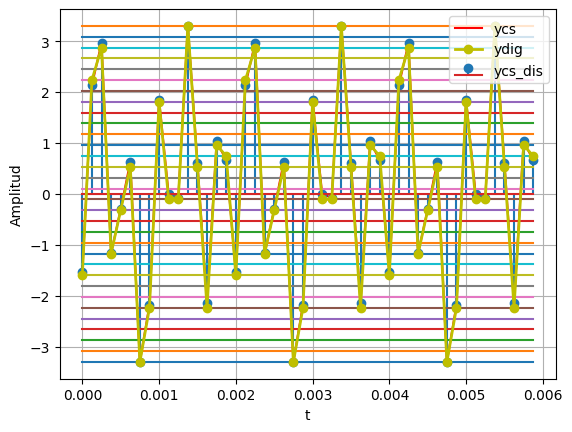

In [66]:
#graficar señales
plt.plot(t,y,c='r', label='ycs')#cs continua
plt.stem(t,y, label='ycs_dis')#cs discreta
#estados de cuantización
for v in ve:
  plt.plot(t,v*np.ones(len(t)))
# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()